# Applied Statistics Problem Notebook

## Lady Tasting Tea Experiment

### The Experiment
https://jyyna.co.uk/lady-tasting-tea/
This notebook presents an alteration to the classic Lady Tasting Tea Experiment, originally formulated by Ronald Fisher. Fisher wanted to test Muriel Bristol's claim that she could distinguish in a cup of tea whether the milk was added before or after the tea, and if she was successful, determine if she actually possessed the ability or if her success occurred due to chance. 

In the original experiment, 8 cups of tea were prepared: 4 with milk added first, and 4 with tea added first. With the cups presented in random order, the Lady had to distinguish the two brewing methods. 

Lady Bristol did indeed correctly identify all 8 cups. Fisher determined that the probability of this occurring by chance was low. The findings supported a rejection of the null hypothesis that her success occurred due to chance. 

In this updated version of the experiment, 12 cups of tea will be 'prepared' for our proverbial Lady to sample. In 8 cups, tea will be added first, with the remaining 4 being prepared with milk first. The aim is to examine how the probability of the Lady correctly identifying all 12 cups compares to the probability in the original experiment. 

For reference, the probability of the Lady selecting all 8 cups correctly in the original experiment was 1/70 or approximately 0.0143. A p-value below .05 is generally considered statistically significant by convention- https://measuringu.com/setting-alpha/ - minimising the risk of a Type 1 error. In this case, there was a roughly 1.4% chance that the Lady selected the correct cups by chance. 

A more stringent threshold for significance could require a p-value below .01 or even .001. This is often used in medical research where the effects of a false positive could mean attributing therapeutic effects to a drug where they are not present, leading to devastating consequences. However, in many cases a threshold of .05 balances the risk of a Type 1 and Type 2 error.

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Dataframes for visualisation of experiment
#https://pandas.pydata.org/docs/
import pandas as pd

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical function- t-test and ANOVA
import scipy.stats as stats

In [3]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

In [4]:
# Create a dataframe to store all 12 cups
tea_df = pd.DataFrame()

# Insert a column which specifies whether milk has been poured first.
# np.repeat() to specify elements https://numpy.org/doc/2.3/reference/generated/numpy.repeat.html
tea_df['milk_first'] = np.repeat(['yes', 'no'], [4, 8])

# Insert a column which specifies the Lady's guesses
tea_df['guesses_milk_first'] = np.repeat(['yes', 'no'], [4, 8])

# Use pd.DataFrame.sample to put rows in a random order- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
tea_df_ordered = tea_df.sample(12, replace=False)

# Reset the index so original position is not shown
tea_df_unordered = tea_df_ordered.reset_index(drop=True)

In [5]:
tea_df_unordered

,milk_first,guesses_milk_first
0,yes,yes
1,no,no
2,yes,yes
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,yes,yes
9,no,no


In [6]:
# https://docs.python.org/3/library/math.html#math.comb
# Using math.comb() to return the number of ways to choose four elements (cups) from a set of twelve where the order of the chosen 
# elements does not matter and no element is selected more than once
ways = math.comb(no_cups, no_cups_milk_first)

# Show
ways

495

There are 495 possible ways to select four cups from twelve where the order of the cups does not matter. The next cell will calculate how many ways there are of selecting four cups from twelve where the order is maintained

In [7]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show
ways_ordered

11880

There are 11,880 ways of selecting four cups from twelve, while keeping them in order. However, order does not matter in this experiment. The dataframes below show that the order which the cups of tea are tasted does not matter. The Lady will taste a cup of tea and guess its brewing method, and the answer is yes or no regardless of which cup is presented first, second, and so on. 

In [8]:
display(tea_df_ordered)
display(tea_df_unordered)

,milk_first,guesses_milk_first
0,yes,yes
10,no,no
1,yes,yes
5,no,no
11,no,no
4,no,no
8,no,no
9,no,no
2,yes,yes
6,no,no


,milk_first,guesses_milk_first
0,yes,yes
1,no,no
2,yes,yes
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,yes,yes
9,no,no


To determine how many ways of selecting four cups there are when order does not matter, we need to determine how many ways there are of shuffling four cups, and the number of ways the four cups can be selected in order by this number


In [9]:
# No of ways of shuffling four cups
no_shuffles = 4 * 3 * 2 * 1

# Show
no_shuffles

24

In [10]:
# No of combinations
no_combs = ways_ordered // no_shuffles

# Show
no_combs

495

This further demonstrates that there are 495 ways to select the four cups when the order is not important. This confirms the result we obtained earlier from the math.comb() function. There is only one way to select the correct four cups. Therefore, the probability that the Lady randomly selects the correct four cups is 1/495. 

To visualise the possible selections, we can create use the itertools combinations function to show all the possible selections of four cups out of twelve

In [11]:
# The cup labels
labels = list(range(no_cups))

# Show
labels

# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea- how many combination of 4 can be selected from 12 -https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show
combs


[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

By then defining which cups were made with milk first, we can see which of the possible combinations overlap with the correct cups

In [12]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()


In [13]:
# Create an empty list to store the number of correct picks for each combination
no_overlaps = []

# Loop through the combinations
for comb in combs:
  # Turn comb into a set
  s1 = set(comb)
  # Turn labels_milk into a set
  s2 = set(labels_milk)
  # Figure out where they overlap- https://www.w3schools.com/python/ref_set_intersection.asp
  overlap = s1.intersection(s2)
  # Show the combination and the overlap- len(overlap) shows how many items overlapped in both sets 
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps- to retain a list of all numbers of correct guesses for each combination
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {0, 1}
(0, 1, 2, 4) 2 {0, 1}
(0, 1, 2, 5) 3 {0, 1, 5}
(0, 1, 2, 6) 2 {0, 1}
(0, 1, 2, 7) 2 {0, 1}
(0, 1, 2, 8) 3 {0, 1, 8}
(0, 1, 2, 9) 2 {0, 1}
(0, 1, 2, 10) 2 {0, 1}
(0, 1, 2, 11) 2 {0, 1}
(0, 1, 3, 4) 2 {0, 1}
(0, 1, 3, 5) 3 {0, 1, 5}
(0, 1, 3, 6) 2 {0, 1}
(0, 1, 3, 7) 2 {0, 1}
(0, 1, 3, 8) 3 {0, 1, 8}
(0, 1, 3, 9) 2 {0, 1}
(0, 1, 3, 10) 2 {0, 1}
(0, 1, 3, 11) 2 {0, 1}
(0, 1, 4, 5) 3 {0, 1, 5}
(0, 1, 4, 6) 2 {0, 1}
(0, 1, 4, 7) 2 {0, 1}
(0, 1, 4, 8) 3 {0, 1, 8}
(0, 1, 4, 9) 2 {0, 1}
(0, 1, 4, 10) 2 {0, 1}
(0, 1, 4, 11) 2 {0, 1}
(0, 1, 5, 6) 3 {0, 1, 5}
(0, 1, 5, 7) 3 {0, 1, 5}
(0, 1, 5, 8) 4 {0, 1, 5, 8}
(0, 1, 5, 9) 3 {0, 1, 5}
(0, 1, 5, 10) 3 {0, 1, 5}
(0, 1, 5, 11) 3 {0, 1, 5}
(0, 1, 6, 7) 2 {0, 1}
(0, 1, 6, 8) 3 {0, 1, 8}
(0, 1, 6, 9) 2 {0, 1}
(0, 1, 6, 10) 2 {0, 1}
(0, 1, 6, 11) 2 {0, 1}
(0, 1, 7, 8) 3 {0, 1, 8}
(0, 1, 7, 9) 2 {0, 1}
(0, 1, 7, 10) 2 {0, 1}
(0, 1, 7, 11) 2 {0, 1}
(0, 1, 8, 9) 3 {0, 1, 8}
(0, 1, 8, 10) 3 {0, 1, 8}
(0, 1, 8, 11) 3 {0, 1, 8}
(0, 1, 9

In [14]:
# Show the overlaps.
print(no_overlaps)

# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show- how many ways of guessing 0, 1, 2, 3 and 4 cups there are. 
counts

[2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 4, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

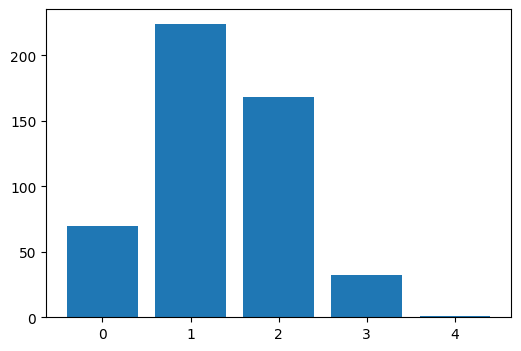

In [15]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

The figure above shows how many overlaps there were, i.e., how many correct guesses were made, from each of the possible combinations. In almost half of the combinations, one or two correct guesses were made. This figure is a good visual representation of just how unlikely it is that the four correct cups can be identified by chance alone. How likely is it that someone could correctly guess some of the four cups?

In [16]:
# Proability of randomly selecting zero, one, two or three out of four correct cups 
chance_zero_cup = round((counts[1][0]/495*100),2)
chance_one_cup = round((counts[1][1]/495*100),2)
chance_two_cup = round((counts[1][2]/495*100),2)
chance_three_cup = round((counts[1][3]/495*100),2)

print(f'There is a {chance_zero_cup}% chance of choosing zero correct cups, a {chance_one_cup}% chance of choosing one correct cup, a {chance_two_cup}% chance of choosing two correct cups, and a {chance_three_cup}% chance of choosing three correct cups')

There is a 14.14% chance of choosing zero correct cups, a 45.25% chance of choosing one correct cup, a 33.94% chance of choosing two correct cups, and a 6.46% chance of choosing three correct cups


In [17]:
# Proability of randomly selecting the four correct cups 
prob_four_cup = counts[1][4]/495
chance_four_cup = round(prob_four_cup*100,2)

print(f'The probability of selecting four cups correctly by chance is {prob_four_cup}, which is approximately a {chance_four_cup}% chance')

The probability of selecting four cups correctly by chance is 0.00202020202020202, which is approximately a 0.2% chance


As in the original experiment, the probability of selecting the four correct cups at random (by chance) is below .05. This is generally considered statistically significant. However, to further minimise Type 1 errors, researchers may look for a p-value of less than .01. The probability of the Lady correctly identifying four out of twelve cups by chance is approximately .002, which is below .01. This means that in roughly .2% of experiments, the Lady could indeed select the correct four cups without possessing any special ability to detect the tea brewing method. Therefore, if the Lady does indeed select the correct four cups, it is highly likely that she does possess this unique ability. The null hypothesis that the correct selection occured by chance can be rejected. This can be further confirmed by repeating the experiment. 

In [18]:
# Probability of randomly selecting the correct four cups in two separate experiments
(1/495)**2

4.0812162024283235e-06

The probability of the Lady randomly selecting the correct four cups of tea in two separate experiments is much lower than in one experiment, with the p-value approaching zero. With a p-value below .001, there is a close to zero chance of the Lady successfully guessing the correct cups on two separate occassions. 

In the original experiment with 8 cups, the Lady could be expected to select the correct cups by chance in roughly 1.4% of cases. Although very unlikely to occur, Fisher could have reduced any doubt he had in her abilities by repeating the experiment with twelve cups. In this experiment, there is a .2% chance that the Lady was successful in her random guesses. In this experiment, he could be very confident that the Lady was being honest about her talents. 

However, should any shred of doubt still exist in Fisher's mind, he could have repeated the experiment with twelve cups. If the Lady successfully selected the correct cups again, there would be a close to zero chance of her randomly selecting the correct cups and he could confidently stand over the Lady's claim of unique gifts. 

## Normal Distribution

If 100,000 samples of size 10 are drawn from the normal distribution, what does this look like? 

There are two different formulae for standard deviation depending on whether the data is considered a population on its own, or a sample representing a larger population. 

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

For example, a survey of 1000 people from Limerick would be considered a sample of the larger population of the city. A survey of all the academics at the University of Limerick would be considered a whole population. Let's assume for simplicity that there are exactly 1000 academics working at the University. Therefore, two different formulae would be used to calculate the standard deviation of both of these distributions, even though the sample size is the same. 

How do normal distributions differ when using the population standard deviation versus the sample standard deviation? 

In [19]:
# Generate 100,000 samples of size 10 from the standard normal distribution
# https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html
data = np.random.normal(size = (100000, 10))
data

array([[-1.23853668e+00, -6.65891429e-01, -6.05366679e-01, ...,
         3.52141551e-04, -1.40057185e+00,  2.34976267e-01],
       [ 2.01359003e+00,  1.61712712e-01,  1.06074422e+00, ...,
         1.61453942e-01,  8.44229369e-01,  9.33925166e-01],
       [-1.58602061e+00, -5.14153266e-01,  1.98533968e+00, ...,
         1.32877673e+00, -1.58183366e+00, -1.05600022e+00],
       ...,
       [ 2.38727959e+00,  5.85819884e-02,  2.74451280e+00, ...,
        -1.17795726e+00, -5.36553352e-02, -1.42459666e+00],
       [ 9.62920761e-01, -2.56316811e+00, -4.73529502e-01, ...,
         7.76231141e-01, -5.86700084e-01, -2.18161283e-01],
       [ 4.22865060e-01,  1.34971902e+00, -4.42290689e-01, ...,
         8.02126154e-01,  1.42165198e+00,  5.53309200e-01]])

In [20]:
# Compute the sample standard deviation
# https://numpy.org/doc/2.1/reference/generated/numpy.std.html
sample_std = np.std(data, axis = 1, ddof = 1)
sample_std

array([0.84778194, 0.93158513, 1.23390564, ..., 1.5145831 , 1.06791566,
       0.73804381])

In [21]:
# Compute the population standard deviation
population_std = np.std(data, axis = 1, ddof = 0)
population_std

array([0.80427657, 0.88377925, 1.17058567, ..., 1.43685969, 1.01311375,
       0.70016983])

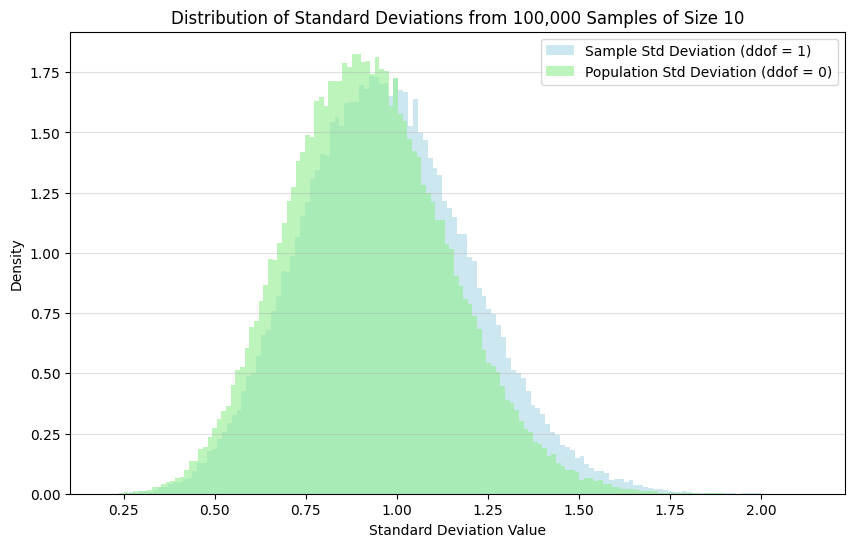

In [22]:
# Plotting histograms of the standard deviations
# Creating the figure
plt.figure(figsize= (10, 6))

# Creating the histogram for sample standard deviation
plt.hist(sample_std, bins = 'auto',
         density = True,
         alpha = .6,
         label = 'Sample Std Deviation (ddof = 1)',
         color = 'lightblue'
         )

# Creating the histogram for population standard deviation
plt.hist(
    population_std, 
    bins = 'auto',
    density = True,
    alpha = .6,
    label = 'Population Std Deviation (ddof = 0)',
    color = 'lightgreen'
)

# Adding labels, title and legend
plt.title('Distribution of Standard Deviations from 100,000 Samples of Size 10')
plt.xlabel('Standard Deviation Value')
plt.ylabel('Density')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y', alpha = .4)

plt.show()

From the distribution above, we can see that standard deviation is larger for sample standard deviation. The difference between the formulae for population and sample standard deviation is that in the formula for population data, we divide by the number of data points, whereas in the formula for sample data, we divide by the number of data points minus 1. This results in the sample standard deviation being larger than the population standard deviation. 

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

## t-Tests

T-Tests are useful for comparing the means of one or two populations using hypothesis testing- https://www.jmp.com/en/statistics-knowledge-portal/t-test

A paired samples t-test can be used to determine if a single group differs on two paired measurements, i.e., if there is a difference in blood pressure before and after taking a certain medication, whereas an independent samples t-test can be used to determine if two groups differ on a particular measurement, i.e., if a the blood pressure of a treatment group differs from that of a control group. 

Here we will demonstrate the ability of an independent samples t-test to detect differences between groups where the mean difference is already known. 

By simulating samples from the normal distribution, we can compare samples with a mean of 0 with samples with a mean of between 0 and 1 (in .1 increments) to determine how well the t-test detects differences in means across samples, depending on how large the difference is. 

The null hypothesis is rejected if the t-test detects a significant difference in sample means. If the t-test fails to reject the null nypothesis when a difference in mean exists, this is a Type 2 error. 

In [23]:
# Simulating a series of means for testing- https://numpy.org/devdocs/reference/generated/numpy.arange.html
d_values = np.arange(0, 1.01, .1)

#Defining parameters- 1000 simulations of sample size 100
sample_size = 100
simulations = 1000

# Create blank list to store results proportions for each d value
hypothesis_proportion = []

# Running loop for 1000 simulations
# Loop through each possible d value, so that for each of the 11 values, 1000 simulations are run for both standard normal distribution, and normal distribution with mean d 
for d in d_values:
    # For each mean value, create a blank list to store the results of each t-test
    null_hypothesis = []
    # Loop through 1000 simulations for each value in d_values
    for i in range(simulations):
        # Simulate standard normal distribution with sample size 100
        # Assign each distribution to its corresponding position in normal_samples- [i, j] locates the jth array within the ith array- https://www.w3schools.com/python/numpy/numpy_array_indexing.asp
        normal_sample = np.random.normal(size=sample_size)
        # Repeat for normal distribution with mean d, SD of 1 and sample size 100. SD is 1 by default so no need to define it here- https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html
        d_sample = np.random.normal(loc=d, size=sample_size)
        # Compare groups in a t-test- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html 
        # independent samples t-test is used as groups are unrelated- https://www.questionpro.com/blog/paired-samples/ 
        ttest_result = stats.ttest_ind(d_sample, normal_sample)
        # Retrieve the p-value (in position 1 in t-test results). If below 0.05, the null hypothesis is rejected. If above, we have failed to reject the null hypothesis
        if ttest_result[1] < .05:
            null_hypothesis.append("Reject")
        else:
            null_hypothesis.append("Fail to Reject")
    #Count the rejects and failed to rejects
    reject_count = null_hypothesis.count("Reject")
    fail_count = null_hypothesis.count("Fail to Reject")
    # Compute the proportion of of times the null hypothesis is not rejected
    proportion = fail_count/(fail_count+reject_count)*100
    # Append the blank list to include a tuple of the d value and the proportion
    hypothesis_proportion.append([d, proportion])

# Convert list to dataframe 
hypothesis_proportion = pd.DataFrame(hypothesis_proportion, columns = ["d value", "proportion"])



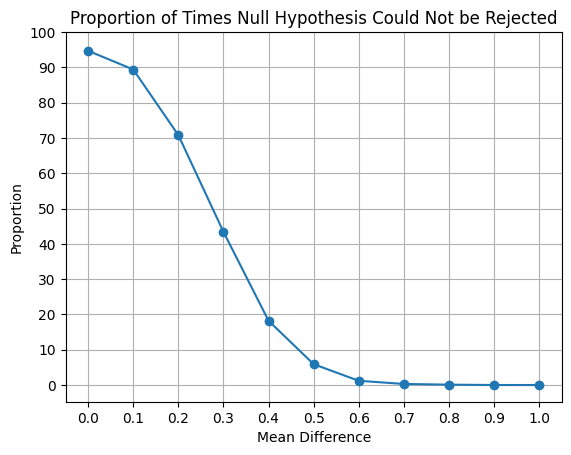

In [24]:
# Plot proportion against d value
plt.plot(hypothesis_proportion["d value"], hypothesis_proportion["proportion"], marker = "o")

# Set title and axis labels
plt.title("Proportion of Times Null Hypothesis Could Not be Rejected")
plt.xlabel("Mean Difference")
plt.ylabel("Proportion")

# Show all x axis intervals
plt.xticks(d_values)

# Show intervals of 10 on the y axis to allow for readability of percentage 
plt.yticks(np.arange(0, 100.01, 10))

# Show grid for readability of percentage
plt.grid(True)

# Show plot
plt.show()

There is no difference between samples when d = 0, i.e., the null hypothesis is true. Therefore, there is no Type 2 error a this value. When there is a mean difference of .1, the t-test fails to reject the null hypothesis over 90% of the time. As mean difference increases, the Type 2 error rate reduces, but at a mean difference of .4 it is still failing to reject the null hypothesis around 20% of the time. The performance at d = .5 is better at around 5% and the Type 2 error rate approaches 0 at a d = .6. 

This suggests that for samples of 100, the t-test has a high Type 2 error rate when detecting small differences in means (<.5) at the p < .05 level. To reduce the error rate, we would have to increase the sample size or allow for a less stringest p-value. However, increasing the p-value threshold makes a Type 1 error more likely (rejecting the null hypothesis when it is true). Increasing the sample size would increase statistical power and make the test more sensitive to smaller mean differences between samples. When comparing samples of 100, the t-test performs well in detecting differences in means of .6 or above. 

## ANOVA

In [ ]:
# Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 14

sample_size = 30

# Sample with mean 0
sample_a = np.random.normal(size=sample_size)

# Sample with mean 0.5
sample_b = np.random.normal(loc = .5, size=sample_size)

# Sample with mean 1
sample_c = np.random.normal(loc = 1, size=sample_size)

In [26]:
# Perform one-way ANOVA to test if all three means are equal

f_statistic, p_value = stats.f_oneway(sample_a, sample_b, sample_c)

# Show
f_statistic, p_value

(14.689987503518832, 3.18700831592084e-06)

In [27]:
ttest_result_ab = stats.ttest_ind(sample_a, sample_b)
ttest_result_ac = stats.ttest_ind(sample_a, sample_c)
ttest_result_bc = stats.ttest_ind(sample_b, sample_c)

ttest_result_ab, ttest_result_ab, ttest_result_bc 

(TtestResult(statistic=-1.7561828288635548, pvalue=0.08433615374781525, df=58.0),
 TtestResult(statistic=-1.7561828288635548, pvalue=0.08433615374781525, df=58.0),
 TtestResult(statistic=-3.734486058281823, pvalue=0.0004310853532063991, df=58.0))